In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/aerryjoop/Downloads/hr.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<function matplotlib.pyplot.show(close=None, block=None)>

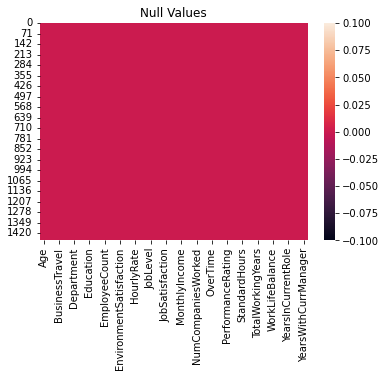

In [7]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(1470, 35)

In [13]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [14]:
df.loc[df['Attrition']==" "]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [15]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [16]:
df_cc=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        df_cc.append(i)
print(df_cc)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [17]:
df_nc=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        df_nc.append(i)
print(df_nc)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


No     1233
Yes     237
Name: Attrition, dtype: int64


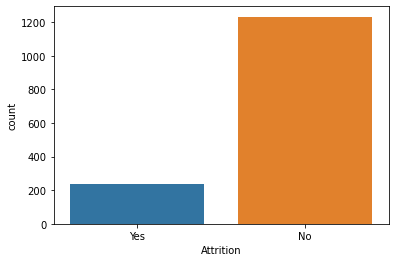

In [18]:
ax = sns.countplot(x="Attrition",data=df)
print(df["Attrition"].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


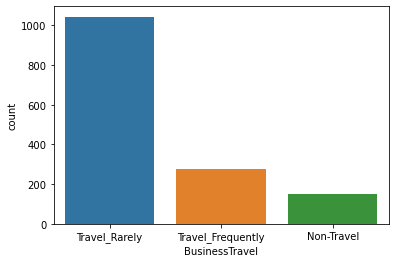

In [19]:
ax = sns.countplot(x="BusinessTravel",data=df)
print(df["BusinessTravel"].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


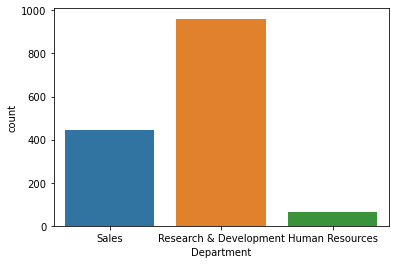

In [20]:
ax = sns.countplot(x="Department",data=df)
print(df["Department"].value_counts())

Male      882
Female    588
Name: Gender, dtype: int64


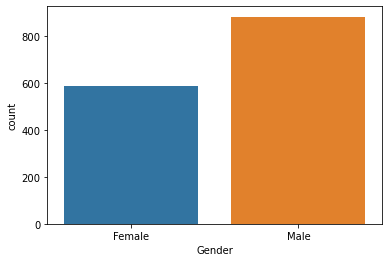

In [21]:
ax = sns.countplot(x="Gender",data=df)
print(df["Gender"].value_counts())

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


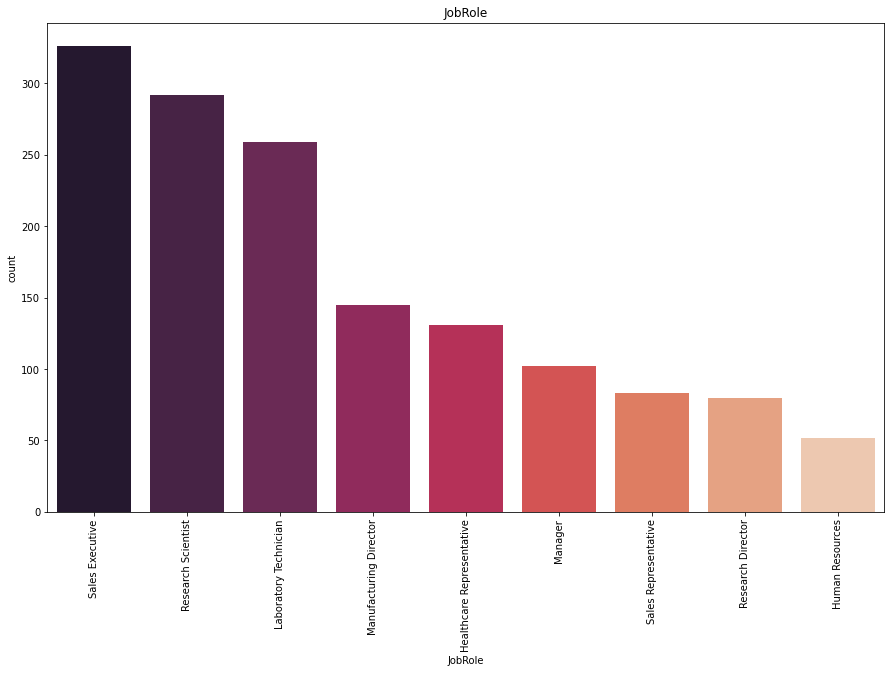

In [22]:
plt.figure(figsize=(15,9))
ax = sns.countplot(df["JobRole"],palette="rocket")
plt.title("JobRole")
plt.xticks(rotation=90)
print(df["JobRole"].value_counts())

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


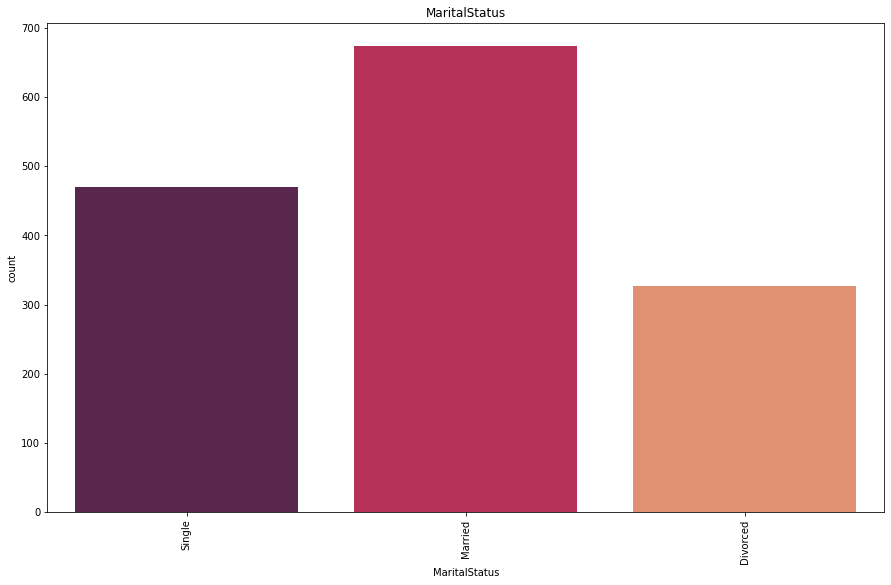

In [23]:
plt.figure(figsize=(15,9))
ax = sns.countplot(df["MaritalStatus"],palette="rocket")
plt.title("MaritalStatus")
plt.xticks(rotation=90)
print(df["MaritalStatus"].value_counts())

In [24]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

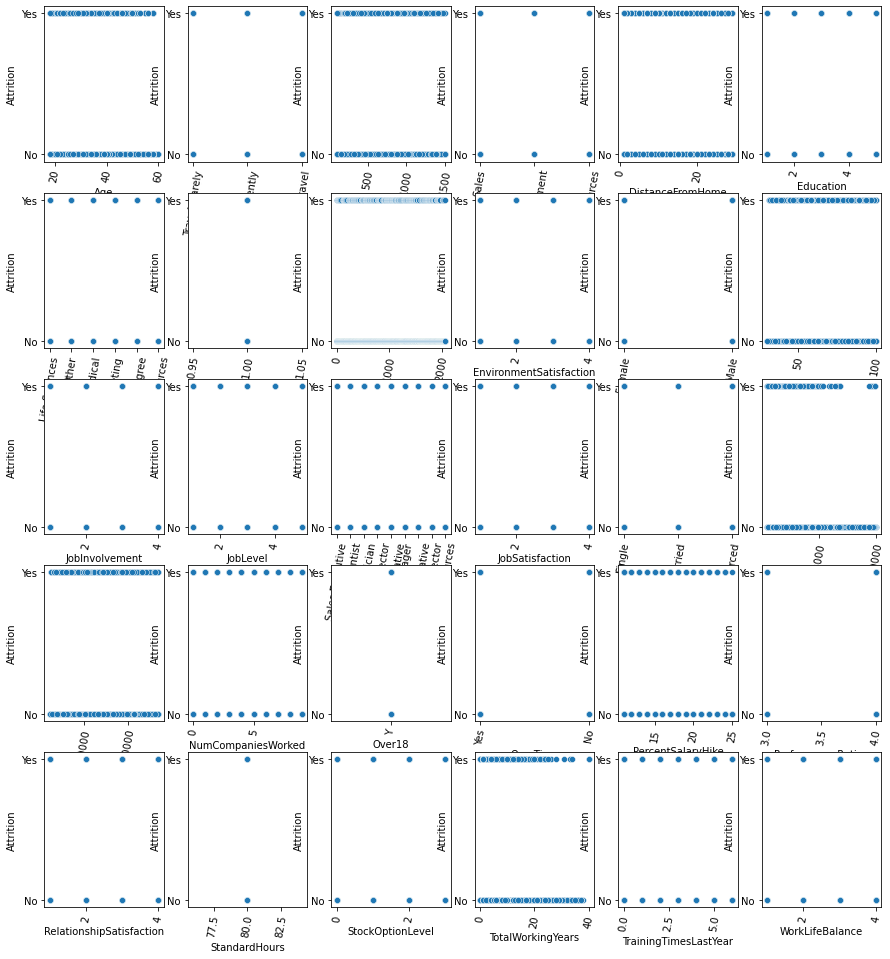

In [25]:
plt.figure(figsize=(15,20))
p=1
for i in x:
    if p<31:
        plt.subplot(6,6,p)
        sns.scatterplot(x=x[i],y=y)
        plt.xticks(rotation=80)
        plt.xlabel(i,fontsize=10)
        plt.ylabel('Attrition',fontsize=10)
    p+=1
plt.show()

In [26]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:>

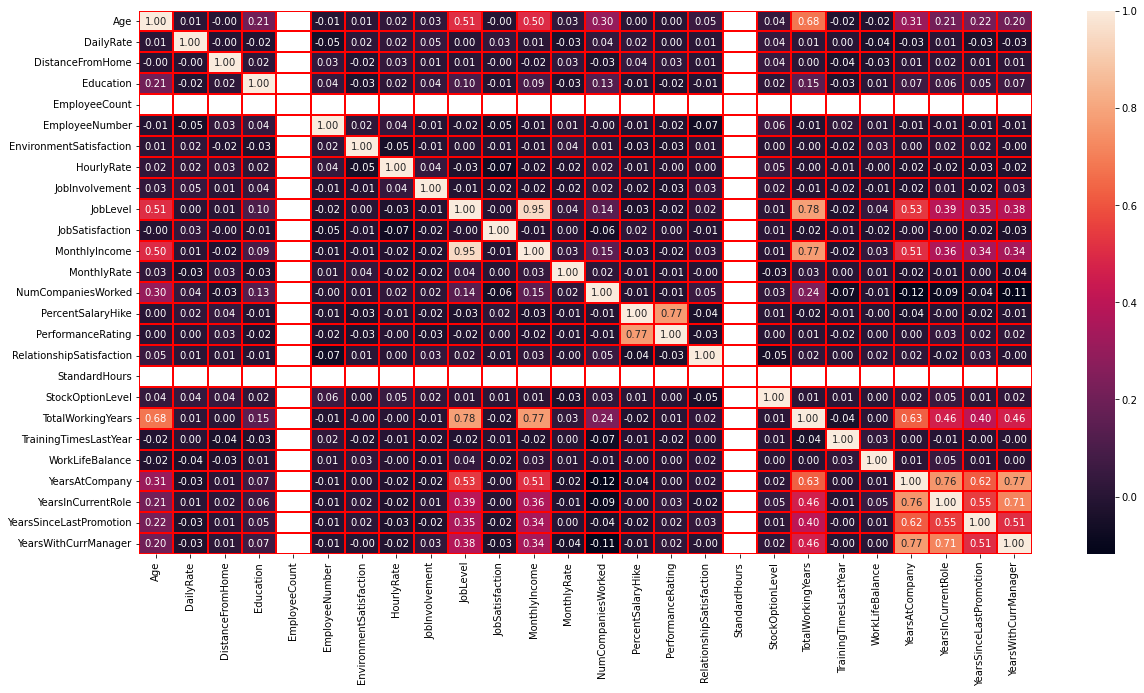

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths = 0.1, linecolor = "red", fmt = "0.2f")

<AxesSubplot:>

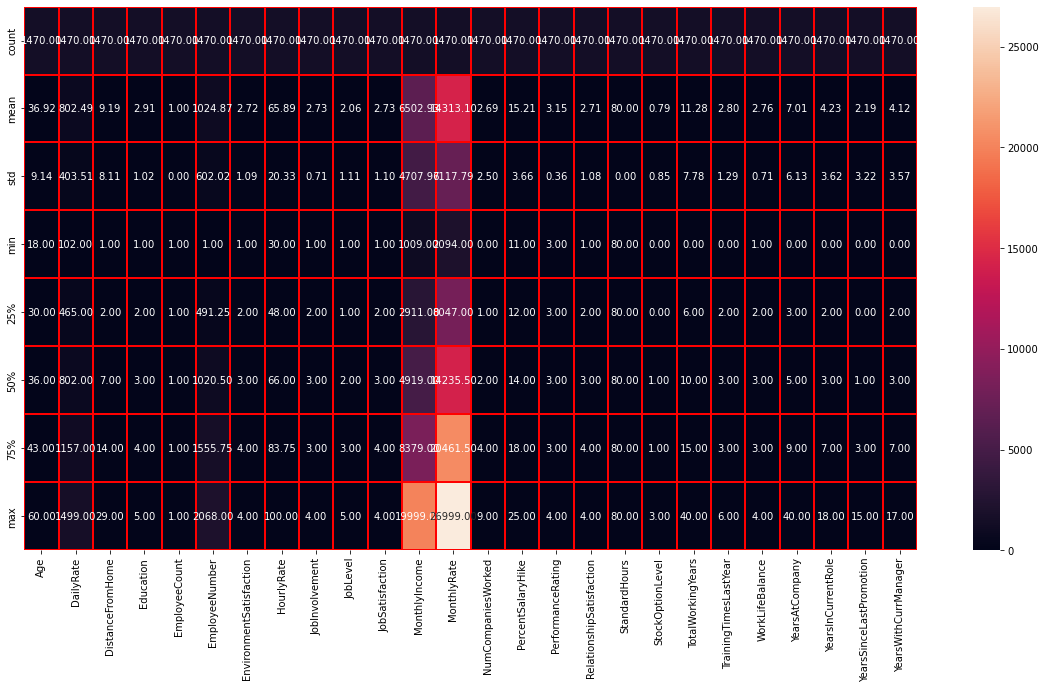

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(), annot=True, linewidths = 0.1, linecolor = "red", fmt = "0.2f")

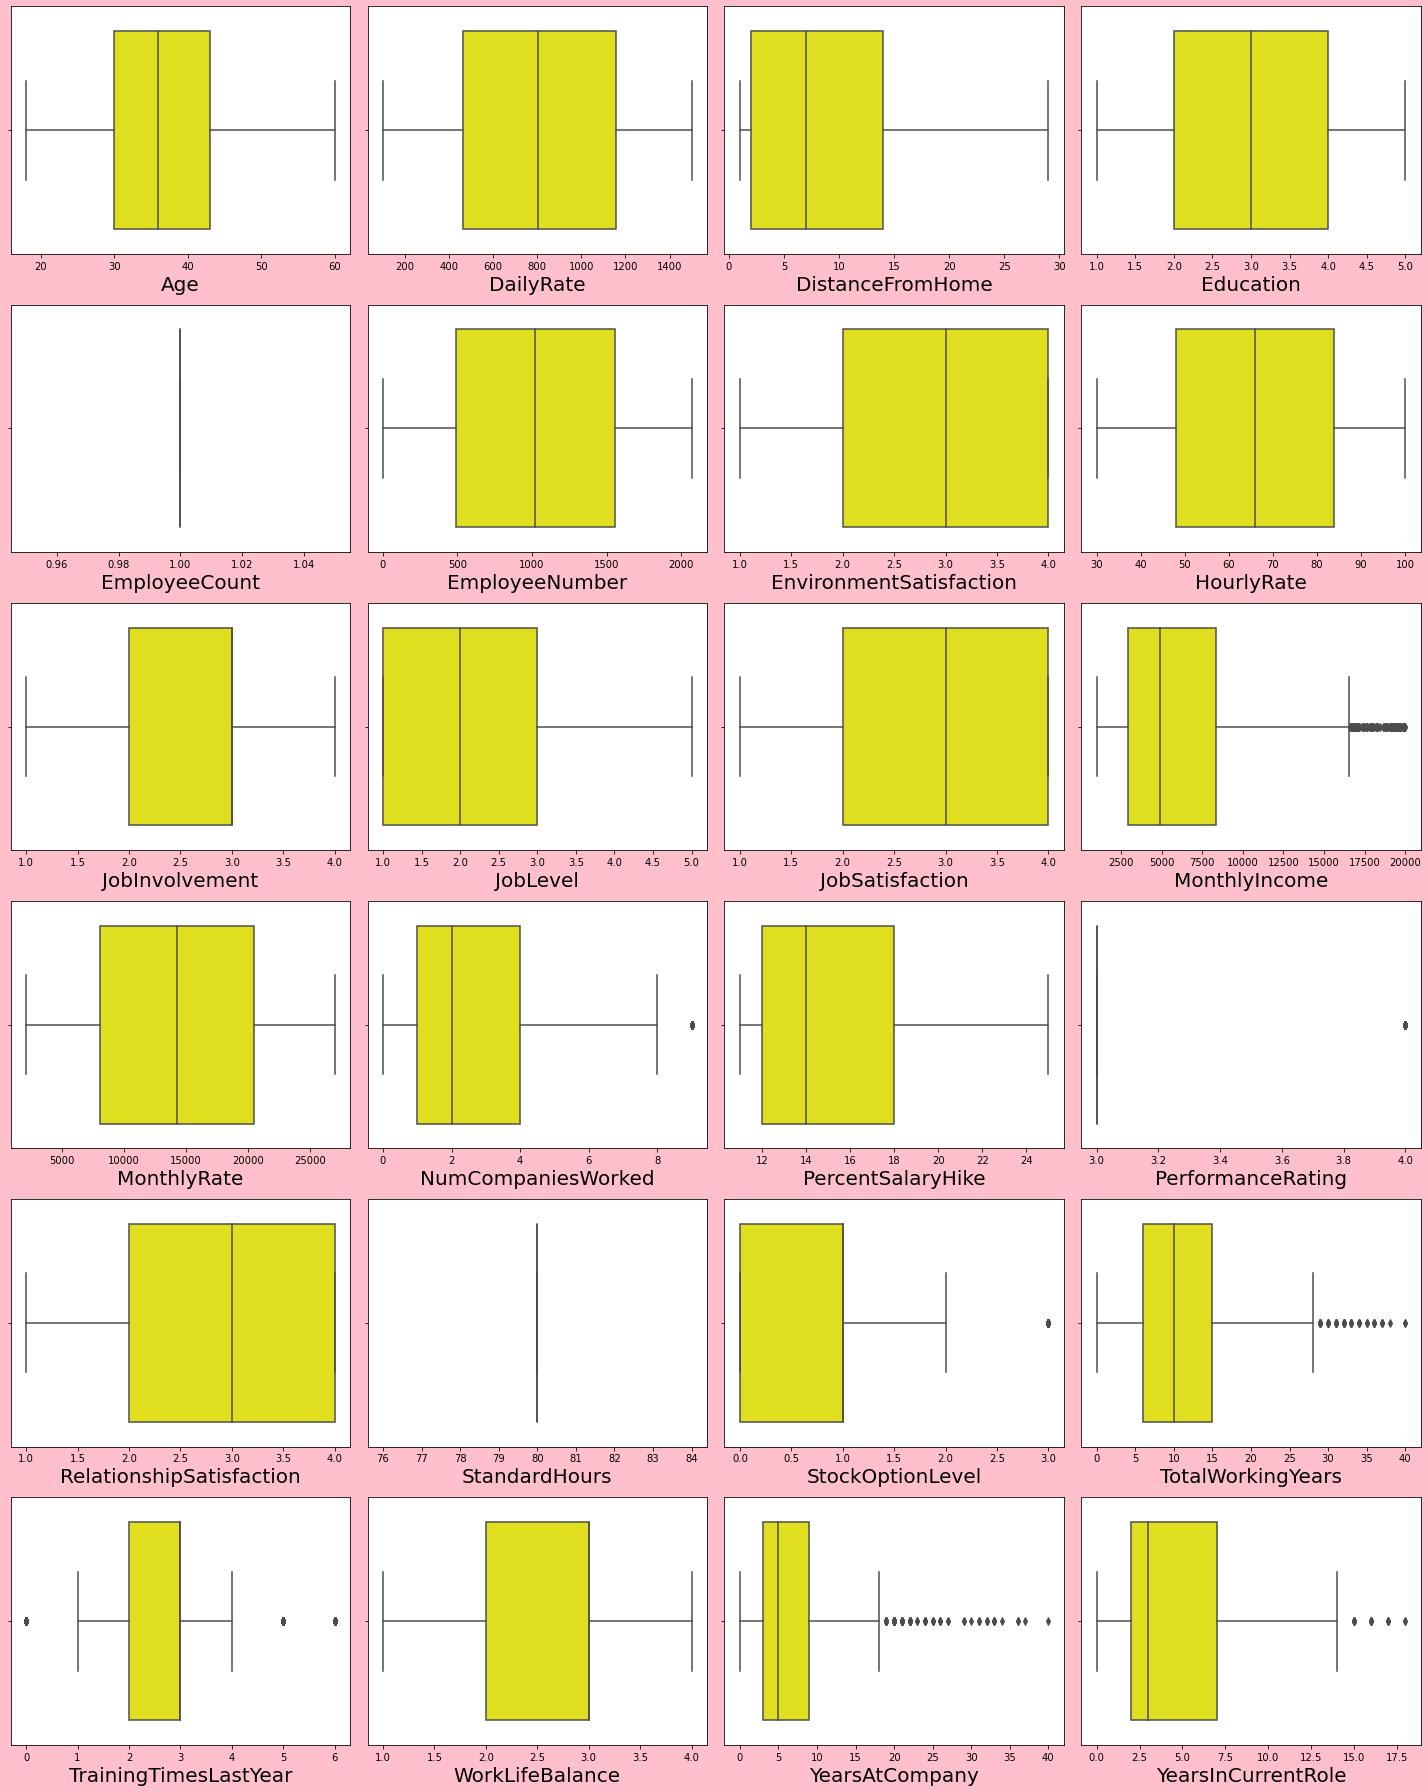

In [29]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber = 1
for column in df_nc:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color="yellow")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [30]:
f = df[['MonthlyIncome', 'NumCompaniesWorked','PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [31]:
z=np.abs(zscore(f))
threshold=3
np.where(z>3)
z

,MonthlyIncome,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.108350,2.125136,0.426230,0.932014,0.421642,2.171982,0.164613,0.063296,0.679146,0.245834
1,0.291719,0.678049,2.346151,0.241988,0.164511,0.155707,0.488508,0.764998,0.368715,0.806541
2,0.937654,1.324226,0.426230,0.932014,0.550208,0.155707,1.144294,1.167687,0.679146,1.155935
3,0.763634,0.678049,0.426230,0.932014,0.421642,0.155707,0.161947,0.764998,0.252146,1.155935
4,0.644858,2.525591,0.426230,0.241988,0.678774,0.155707,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...
1465,0.835451,0.523316,0.426230,0.241988,0.735447,0.155707,0.327893,0.615492,0.679146,0.314873
1466,0.741140,0.523316,0.426230,0.241988,0.293077,1.707500,0.001333,0.764998,0.368715,0.806541
1467,0.076690,0.678049,2.346151,0.241988,0.678774,2.171982,0.164613,0.615492,0.679146,0.314873
1468,0.236474,0.277594,0.426230,0.932014,0.735447,0.155707,0.325228,0.488900,0.679146,1.086895


In [32]:
df1 = df[(z<3).all(axis=1)] 
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


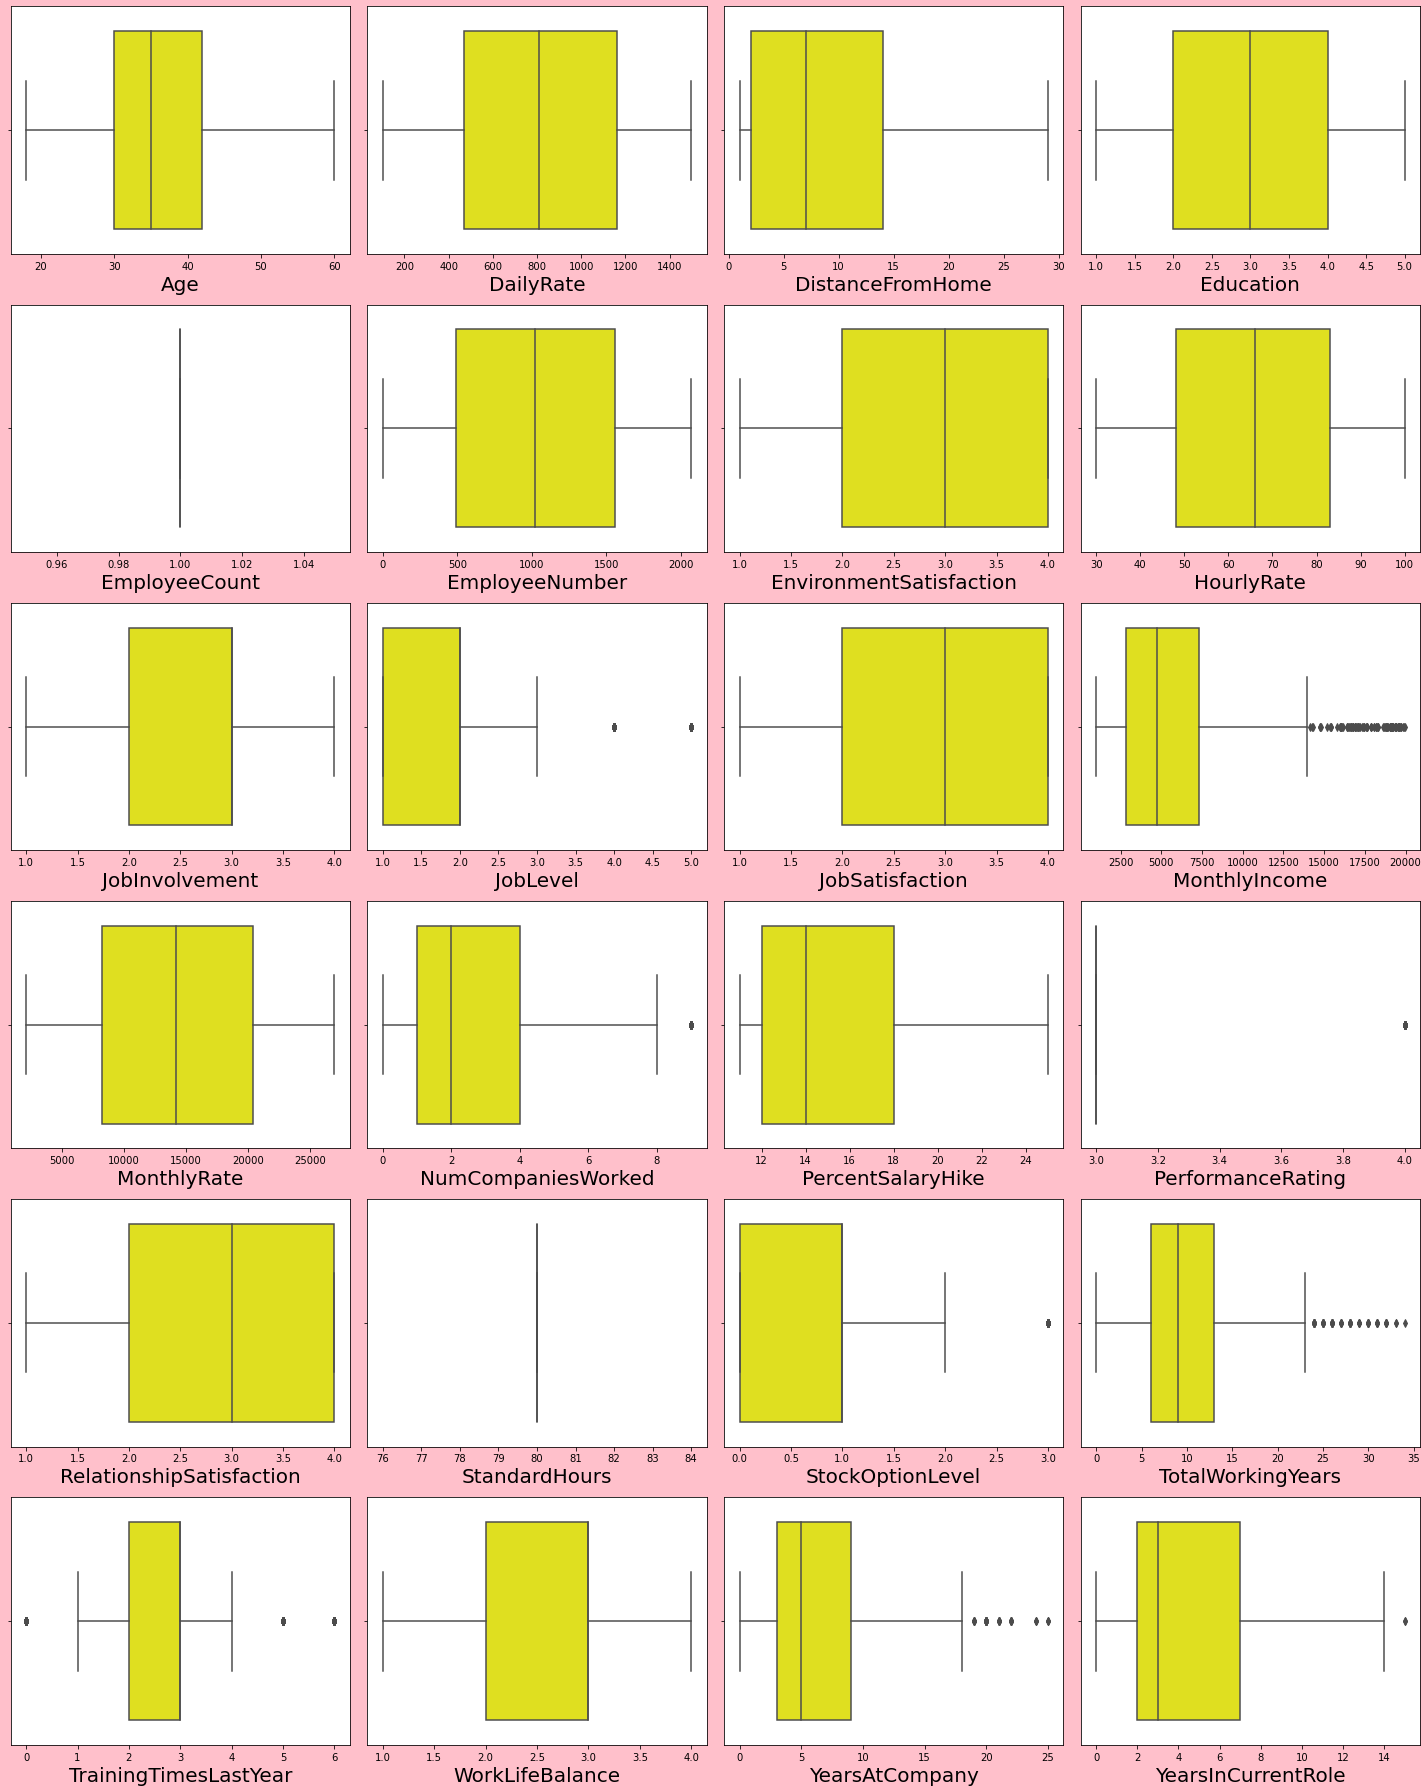

In [33]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1
for column in df_nc:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df1[column],color="yellow")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [34]:
df.shape

(1470, 35)

In [35]:
df1.shape

(1387, 35)

In [36]:
Data_loss=((1470-1387)/1470)*100
Data_loss

5.646258503401361

In [37]:
Q1=f.quantile(0.25)
Q3=f.quantile(0.75)
IQR=Q3 - Q1
iqrdf=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
iqrdf.shape

(779, 35)

In [38]:
Data_Loss = (1470-779)/1470*100
Data_Loss

47.006802721088434

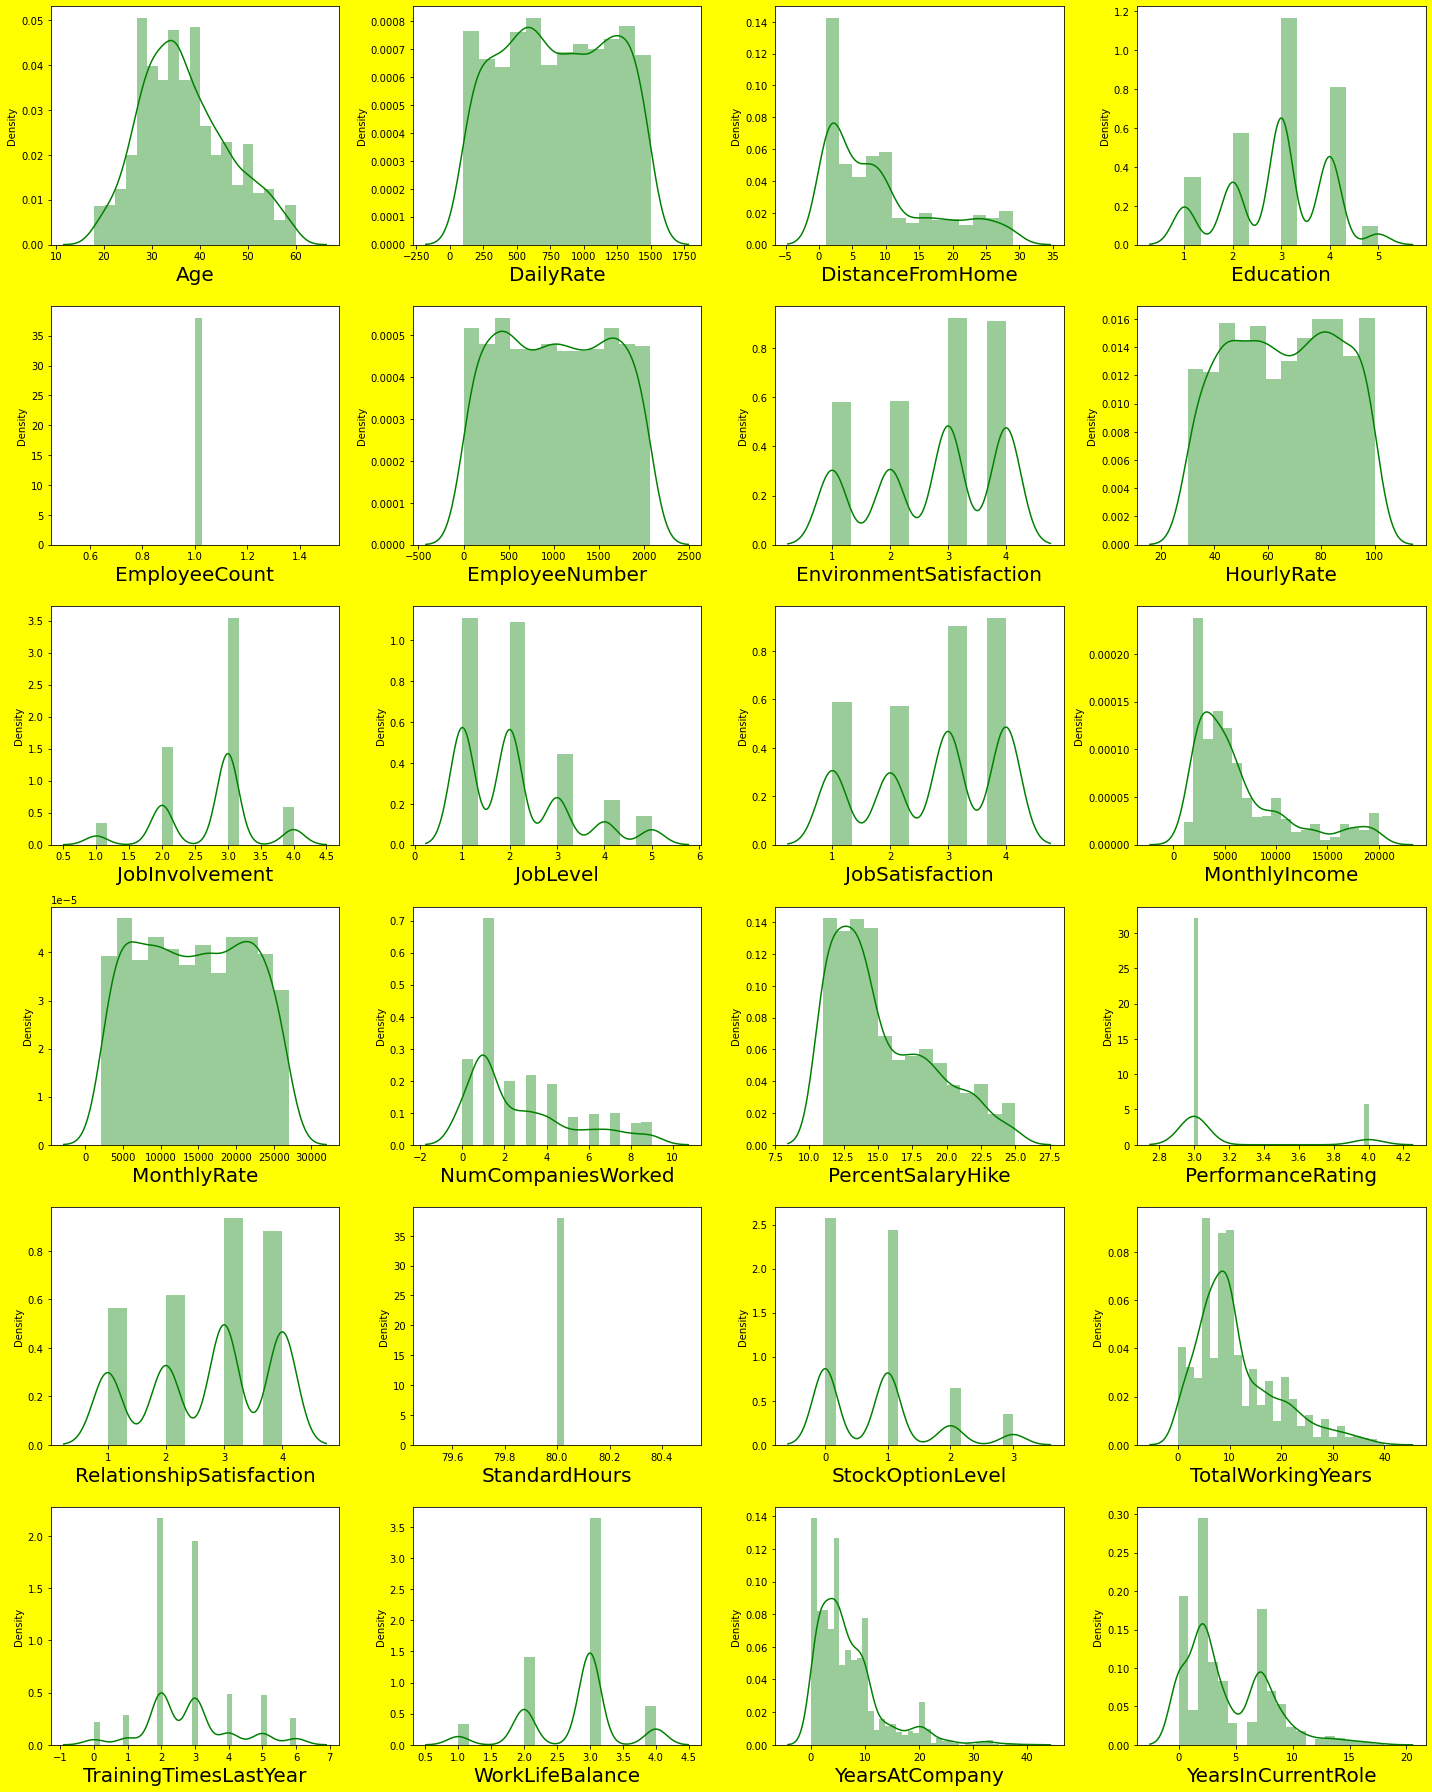

In [39]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in df_nc:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="g")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [40]:
df1.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EmployeeCount               0.000000
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

In [41]:
df1.skew().sort_values(ascending=False)

PerformanceRating           1.931566
YearsSinceLastPromotion     1.756335
MonthlyIncome               1.544770
YearsAtCompany              1.248623
JobLevel                    1.126075
NumCompaniesWorked          1.037715
TotalWorkingYears           1.034487
StockOptionLevel            0.962332
DistanceFromHome            0.954752
PercentSalaryHike           0.800592
YearsInCurrentRole          0.726675
YearsWithCurrManager        0.694506
TrainingTimesLastYear       0.577614
Age                         0.472280
MonthlyRate                 0.030596
EmployeeNumber              0.018931
StandardHours               0.000000
EmployeeCount               0.000000
DailyRate                  -0.017078
HourlyRate                 -0.030481
Education                  -0.289024
RelationshipSatisfaction   -0.295686
EnvironmentSatisfaction    -0.325285
JobSatisfaction            -0.345612
JobInvolvement             -0.501401
WorkLifeBalance            -0.557100
dtype: float64

In [42]:
ff = ['DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [43]:
sk = PowerTransformer(method='yeo-johnson')

In [44]:
df1[ff] = sk.fit_transform(df1[ff].values)
df1[ff].head()

,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.489968,0.349828,0.386674,1.620671,-1.495549,-1.084263,-0.173231,-2.608524,0.231837,0.290524,-1.073534,0.582177
1,0.244561,0.349828,0.144235,-0.561880,1.690425,0.548653,0.147620,0.217074,0.948319,1.006575,0.193168,1.018073
2,-1.028366,-1.141761,-1.431153,1.273711,0.193797,-1.084263,-0.351153,0.217074,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.698191,-1.141761,-0.814425,-0.561880,-1.495549,-1.084263,-0.173231,0.217074,0.621429,1.006575,1.027520,-1.528426
4,-1.028366,-1.141761,-0.504453,1.764103,-0.957525,0.548653,-0.544046,0.217074,-0.933983,-0.390769,0.722874,-0.347871


In [45]:
df1.skew().sort_values(ascending=False)

PerformanceRating           1.931566
Age                         0.472280
YearsSinceLastPromotion     0.212301
PercentSalaryHike           0.112128
JobLevel                    0.110769
StockOptionLevel            0.089929
TrainingTimesLastYear       0.057949
MonthlyRate                 0.030596
MonthlyIncome               0.027700
EmployeeNumber              0.018931
NumCompaniesWorked          0.016175
StandardHours               0.000000
EmployeeCount               0.000000
DistanceFromHome           -0.008149
TotalWorkingYears          -0.009666
DailyRate                  -0.017078
YearsAtCompany             -0.025230
HourlyRate                 -0.030481
YearsInCurrentRole         -0.069631
YearsWithCurrManager       -0.070570
Education                  -0.289024
RelationshipSatisfaction   -0.295686
EnvironmentSatisfaction    -0.325285
JobSatisfaction            -0.345612
JobInvolvement             -0.501401
WorkLifeBalance            -0.557100
dtype: float64

In [46]:
np.abs(3)

3

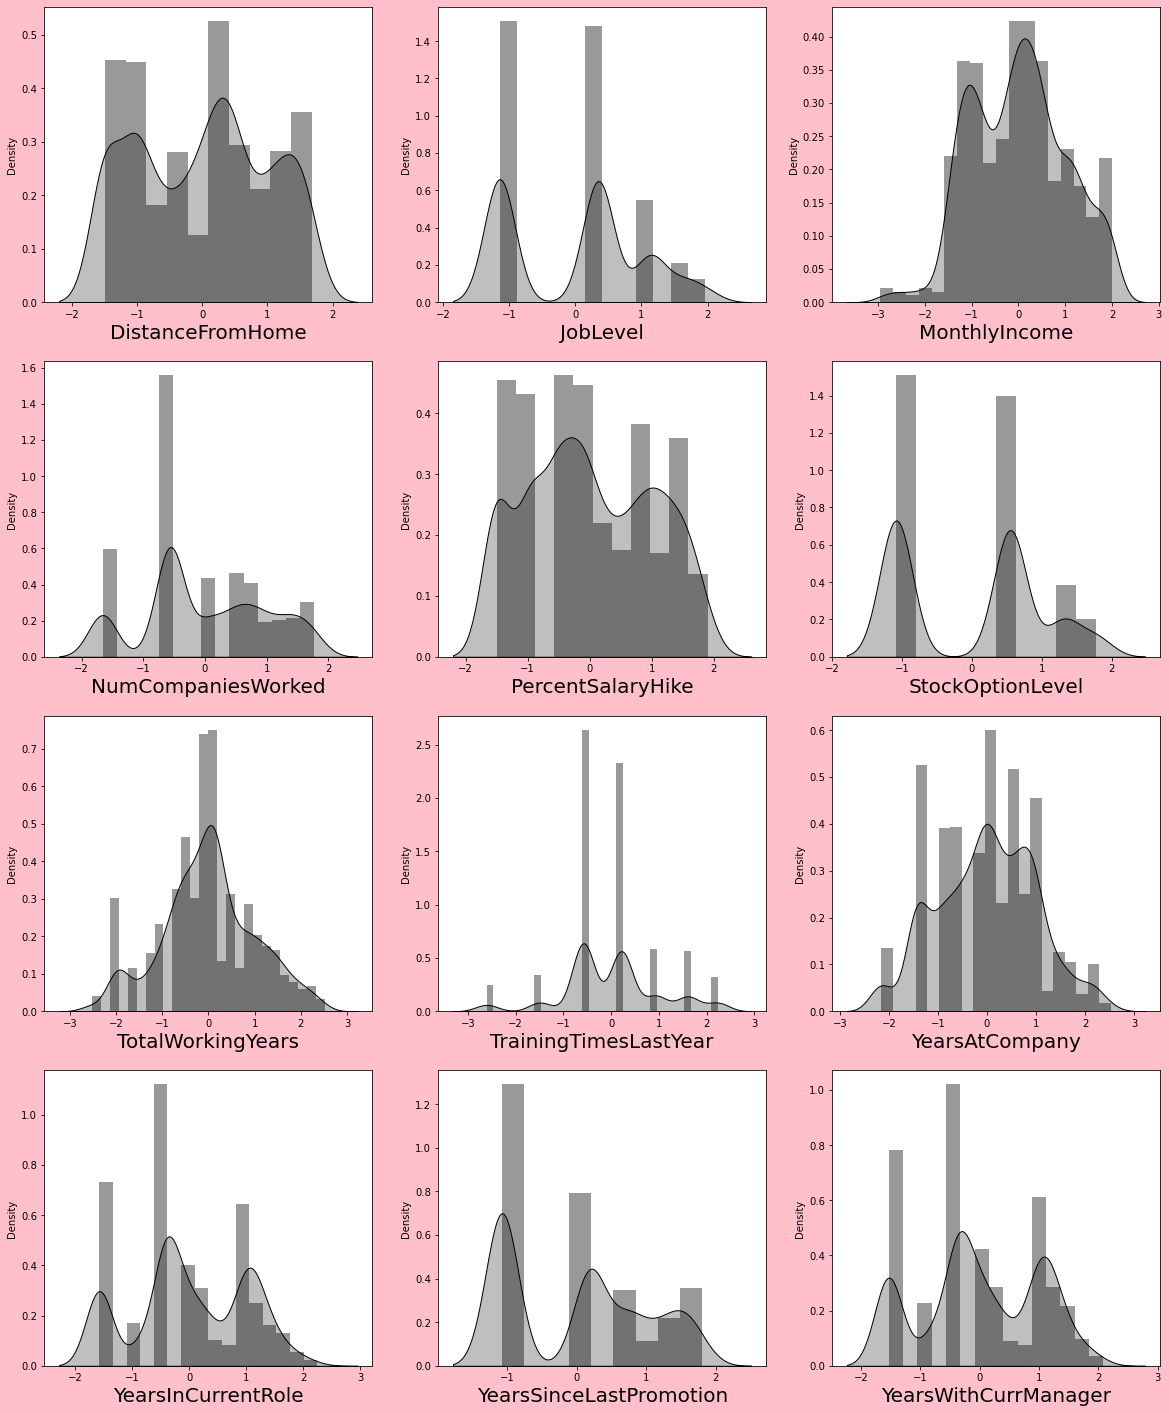

In [47]:
plt.figure(figsize=(20,25), facecolor='pink')
plotnumber = 1

for column in df1[ff]:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df1[column],color='black',kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [48]:
df1.drop('EmployeeCount', axis=1, inplace=True)
df1.drop('EmployeeNumber', axis=1, inplace=True)
df1.drop(['Over18','StandardHours'],axis=1,inplace=True)

In [49]:
df1.shape

(1387, 31)

In [50]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,-1.489968,2,Life Sciences,2,Female,...,3,1,-1.084263,-0.173231,-2.608524,1,0.231837,0.290524,-1.073534,0.582177
1,49,No,Travel_Frequently,279,Research & Development,0.244561,1,Life Sciences,3,Male,...,4,4,0.548653,0.147620,0.217074,3,0.948319,1.006575,0.193168,1.018073
2,37,Yes,Travel_Rarely,1373,Research & Development,-1.028366,2,Other,4,Male,...,3,2,-1.084263,-0.351153,0.217074,3,-2.156089,-1.571814,-1.073534,-1.528426
3,33,No,Travel_Frequently,1392,Research & Development,-0.698191,4,Life Sciences,4,Female,...,3,3,-1.084263,-0.173231,0.217074,3,0.621429,1.006575,1.027520,-1.528426
4,27,No,Travel_Rarely,591,Research & Development,-1.028366,1,Medical,1,Male,...,3,4,0.548653,-0.544046,0.217074,3,-0.933983,-0.390769,0.722874,-0.347871


In [51]:
le = LabelEncoder()
df_cc= ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
df1[df_cc]= df1[df_cc].apply(le.fit_transform)
df1[df_cc]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0
1466,0,2,1,3,1,0,1,0
1467,0,2,1,1,1,4,1,1
1468,0,1,2,3,1,7,1,0


In [52]:
corr = df1.corr()
corr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159366,0.022340,0.021946,-0.038242,-0.028793,0.198502,-0.032676,0.014098,-0.039430,...,-0.000617,0.041744,0.077833,0.634884,-0.013707,-0.016913,0.174149,0.118454,0.103938,0.114962
Attrition,-0.159366,1.000000,-0.001041,-0.057220,0.063637,0.080979,-0.032703,0.023585,-0.112393,0.036252,...,0.010781,-0.052344,-0.175081,-0.220878,-0.059071,-0.062492,-0.201954,-0.187047,-0.050986,-0.186821
BusinessTravel,0.022340,-0.001041,1.000000,-0.004606,-0.003521,-0.015034,-0.010560,0.022576,0.001183,-0.025364,...,-0.018274,-0.029660,-0.012732,0.031888,0.011688,-0.014140,-0.021107,-0.032472,-0.027478,-0.033222
DailyRate,0.021946,-0.057220,-0.004606,1.000000,-0.005398,-0.003967,-0.018442,0.040645,0.033123,-0.005242,...,0.000574,0.004516,0.047773,0.043307,0.006581,-0.044266,0.005806,0.020542,-0.035403,0.007098
Department,-0.038242,0.063637,-0.003521,-0.005398,1.000000,0.037660,0.012846,0.013432,-0.014540,-0.030618,...,-0.039364,-0.037705,-0.001271,-0.007789,0.039412,0.026978,0.026334,0.057983,0.017842,0.023995
DistanceFromHome,-0.028793,0.080979,-0.015034,-0.003967,0.037660,1.000000,0.003595,0.011891,-0.012075,0.010557,...,0.013212,0.010099,0.027082,-0.012129,-0.015334,-0.027681,0.006570,0.013091,-0.003873,-0.002310
Education,0.198502,-0.032703,-0.010560,-0.018442,0.012846,0.003595,1.000000,-0.038017,-0.026223,-0.019166,...,-0.023487,-0.002393,0.026805,0.152263,-0.023484,0.007844,0.038266,0.050563,0.015762,0.026340
EducationField,-0.032676,0.023585,0.022576,0.040645,0.013432,0.011891,-0.038017,1.000000,0.047924,0.010676,...,-0.003621,-0.013734,-0.017331,-0.008101,0.048844,0.034038,0.002739,0.002909,0.019765,0.025918
EnvironmentSatisfaction,0.014098,-0.112393,0.001183,0.033123,-0.014540,-0.012075,-0.026223,0.047924,1.000000,-0.015715,...,-0.025299,0.018414,0.025227,-0.014091,-0.016757,0.032492,0.014305,0.031007,0.039876,0.007643
Gender,-0.039430,0.036252,-0.025364,-0.005242,-0.030618,0.010557,-0.019166,0.010676,-0.015715,1.000000,...,-0.010757,0.041458,0.024390,-0.049776,-0.039213,0.000134,-0.046018,-0.028101,-0.016131,-0.027972


<AxesSubplot:>

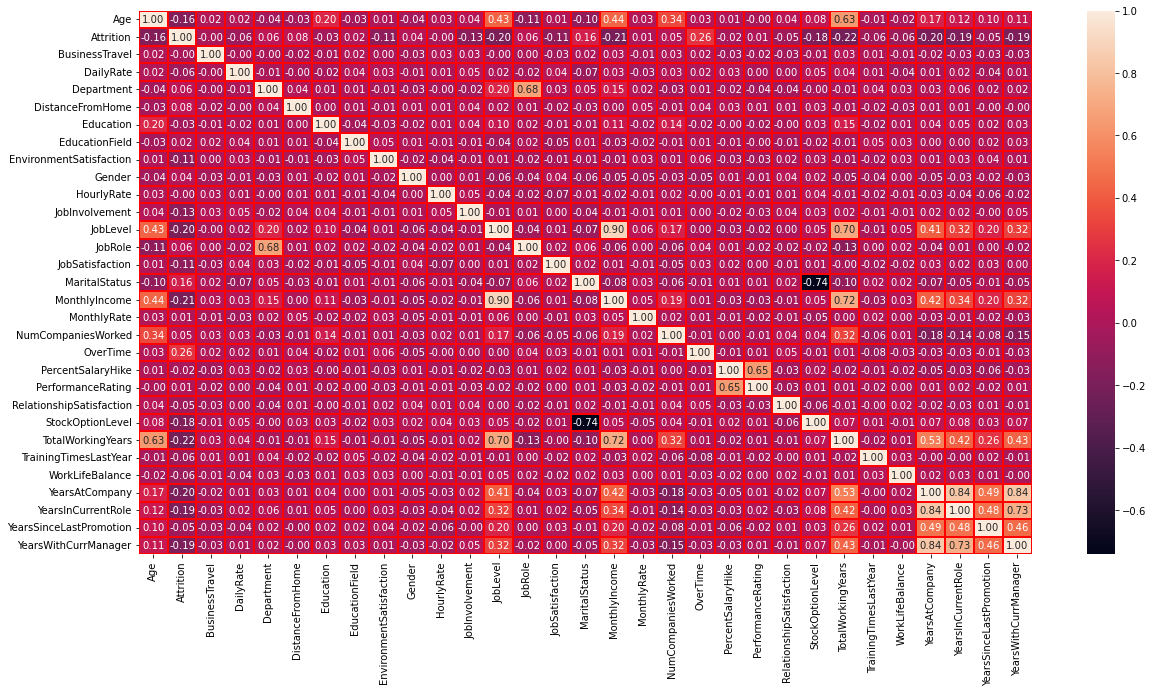

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True, linewidths = 0.1, linecolor = "red", fmt = "0.2f")

In [54]:
corr['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.257237
MaritalStatus               0.160960
DistanceFromHome            0.080979
JobRole                     0.064283
Department                  0.063637
NumCompaniesWorked          0.047508
Gender                      0.036252
EducationField              0.023585
MonthlyRate                 0.014888
PerformanceRating           0.010781
BusinessTravel             -0.001041
HourlyRate                 -0.001532
PercentSalaryHike          -0.017523
Education                  -0.032703
YearsSinceLastPromotion    -0.050986
RelationshipSatisfaction   -0.052344
DailyRate                  -0.057220
TrainingTimesLastYear      -0.059071
WorkLifeBalance            -0.062492
EnvironmentSatisfaction    -0.112393
JobSatisfaction            -0.114206
JobInvolvement             -0.133957
Age                        -0.159366
StockOptionLevel           -0.175081
YearsWithCurrManager       -0.186821
YearsInCurrentRole         -0.187047
J

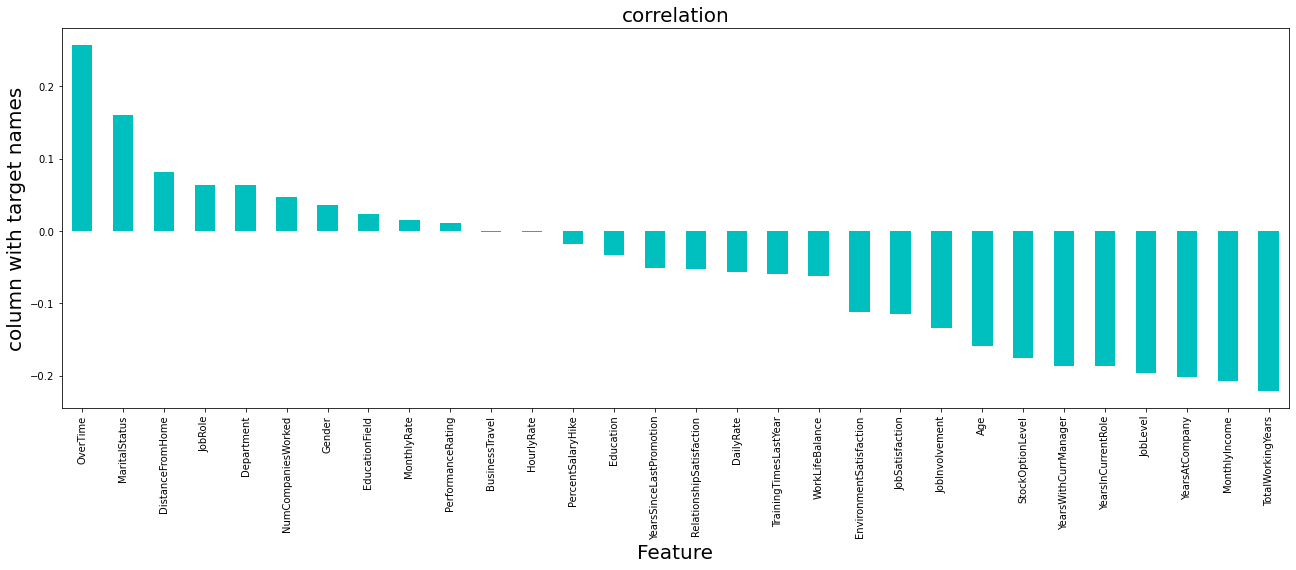

In [55]:
plt.figure(figsize=(22,7))
df1.corr()['Attrition'].sort_values(ascending = False).drop(['Attrition']).plot(kind='bar',color = 'c')
plt.xlabel('Feature', fontsize = 20)
plt.ylabel('column with target names', fontsize = 20)
plt.title('correlation', fontsize = 20)
plt.show()

In [56]:
df1.drop("BusinessTravel",axis=1, inplace=True)
df1.drop("HourlyRate",axis=1, inplace=True)

In [57]:
df1

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,-1.489968,2,1,2,0,3,...,3,1,-1.084263,-0.173231,-2.608524,1,0.231837,0.290524,-1.073534,0.582177
1,49,0,279,1,0.244561,1,1,3,1,2,...,4,4,0.548653,0.147620,0.217074,3,0.948319,1.006575,0.193168,1.018073
2,37,1,1373,1,-1.028366,2,4,4,1,2,...,3,2,-1.084263,-0.351153,0.217074,3,-2.156089,-1.571814,-1.073534,-1.528426
3,33,0,1392,1,-0.698191,4,1,4,0,3,...,3,3,-1.084263,-0.173231,0.217074,3,0.621429,1.006575,1.027520,-1.528426
4,27,0,591,1,-1.028366,1,3,1,1,3,...,3,4,0.548653,-0.544046,0.217074,3,-0.933983,-0.390769,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,1,1.408969,2,3,3,1,4,...,3,3,0.548653,1.039364,0.217074,3,0.003289,-0.390769,-1.073534,0.018680
1466,39,0,613,1,-0.049519,1,3,4,1,2,...,3,1,0.548653,-0.007630,1.606919,3,0.436162,1.006575,0.193168,1.018073
1467,27,0,155,1,-0.440553,3,1,2,1,4,...,4,2,0.548653,-0.544046,-2.608524,3,0.231837,-0.390769,-1.073534,0.018680
1468,49,0,1023,2,-1.028366,3,3,4,1,2,...,3,4,-1.084263,1.039364,0.217074,2,0.791264,0.793764,-1.073534,1.205782


In [58]:
x=df1.drop('Attrition',axis=1)
y=df1['Attrition']

In [59]:
x

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,-1.489968,2,1,2,0,3,0.349828,...,3,1,-1.084263,-0.173231,-2.608524,1,0.231837,0.290524,-1.073534,0.582177
1,49,279,1,0.244561,1,1,3,1,2,0.349828,...,4,4,0.548653,0.147620,0.217074,3,0.948319,1.006575,0.193168,1.018073
2,37,1373,1,-1.028366,2,4,4,1,2,-1.141761,...,3,2,-1.084263,-0.351153,0.217074,3,-2.156089,-1.571814,-1.073534,-1.528426
3,33,1392,1,-0.698191,4,1,4,0,3,-1.141761,...,3,3,-1.084263,-0.173231,0.217074,3,0.621429,1.006575,1.027520,-1.528426
4,27,591,1,-1.028366,1,3,1,1,3,-1.141761,...,3,4,0.548653,-0.544046,0.217074,3,-0.933983,-0.390769,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,1.408969,2,3,3,1,4,0.349828,...,3,3,0.548653,1.039364,0.217074,3,0.003289,-0.390769,-1.073534,0.018680
1466,39,613,1,-0.049519,1,3,4,1,2,1.133237,...,3,1,0.548653,-0.007630,1.606919,3,0.436162,1.006575,0.193168,1.018073
1467,27,155,1,-0.440553,3,1,2,1,4,0.349828,...,4,2,0.548653,-0.544046,-2.608524,3,0.231837,-0.390769,-1.073534,0.018680
1468,49,1023,2,-1.028366,3,3,4,1,2,0.349828,...,3,4,-1.084263,1.039364,0.217074,2,0.791264,0.793764,-1.073534,1.205782


In [60]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int64

In [61]:
x.shape

(1387, 28)

In [62]:
y.shape

(1387,)

In [63]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [64]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [65]:
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [66]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

In [67]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.741780,0.846311,1.602798,-1.669838,-0.758977,-0.901963,-0.433854,-1.072575,0.652441,0.577878,...,-0.331250,-1.447713,-0.963258,0.056306,-2.692936,-2.162344,0.442898,0.486765,-1.066127,0.793070
1,1.678256,-1.274396,-0.331585,0.183717,-1.796635,-0.901963,0.501720,0.932335,-0.696713,0.577878,...,3.018864,1.409063,0.751536,0.381710,0.294285,0.549074,1.190299,1.243462,0.281112,1.251302
2,0.273543,1.544625,-0.331585,-1.176560,-0.758977,1.476345,1.437294,0.932335,-0.696713,-1.020684,...,-0.331250,-0.495454,-0.963258,-0.124140,0.294285,0.549074,-2.048076,-1.481287,-1.066127,-1.425682
3,-0.194695,1.593584,-0.331585,-0.823728,1.316337,-0.901963,1.437294,-1.072575,0.652441,-1.020684,...,-0.331250,0.456805,-0.963258,0.056306,0.294285,0.549074,0.849303,1.243462,1.168513,-1.425682
4,-0.897051,-0.470434,-0.331585,-1.176560,-1.796635,0.683575,-1.369428,0.932335,0.652441,-1.020684,...,-0.331250,1.409063,0.751536,-0.319770,0.294285,0.549074,-0.773231,-0.233201,0.844497,-0.184634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,0.975899,-0.127720,1.602798,1.595515,-0.758977,-0.901963,-0.433854,-1.072575,2.001594,0.241403,...,-0.331250,1.409063,-0.963258,-0.327187,-0.370990,0.549074,-0.107948,0.072518,-0.002463,-0.141631
2312,-0.662932,0.544826,1.602798,0.190007,-0.758977,-0.109194,-0.433854,0.932335,0.652441,-1.020684,...,-0.331250,-0.495454,-0.818487,-1.661683,0.294285,-0.806635,-1.177497,-1.342726,-1.066127,-1.320907
2313,-0.545873,-1.148133,-0.331585,0.233929,1.316337,0.683575,-0.433854,0.932335,-2.045867,-0.702491,...,-0.331250,0.456805,-0.963258,-0.023451,1.057789,-2.162344,0.762385,1.027789,-1.066127,1.290580
2314,-0.077635,-0.753882,-0.331585,-0.894696,-1.796635,-0.901963,0.501720,0.932335,-0.696713,0.927063,...,-0.331250,-1.447713,0.406623,0.948252,1.826834,-0.806635,1.172789,0.695408,0.719039,0.712855


In [68]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.918088,Age
1,1.045882,DailyRate
2,2.005708,Department
3,1.037463,DistanceFromHome
4,1.080021,Education
5,1.048196,EducationField
6,1.071154,EnvironmentSatisfaction
7,1.057720,Gender
8,1.094819,JobInvolvement
9,5.751877,JobLevel


In [69]:
maxAccu=0
maxRS=0
for i in range(1,1400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is :",maxAccu,"on random state  ",maxRS)

Best accuracy score is : 0.860431654676259 on random state   532


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state =869)


In [71]:
x_train

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2141,0.273543,-1.331086,-0.331585,0.735523,1.316337,-0.901963,0.501720,-1.072575,0.652441,0.577878,...,-0.33125,0.456805,1.016352,0.176707,0.547811,-0.806635,0.013211,-0.737671,-1.066127,0.362395
300,-0.311754,-0.478165,1.602798,0.183717,-0.758977,2.269114,0.501720,-1.072575,-0.696713,0.577878,...,-0.33125,1.409063,-0.963258,0.804805,-0.548354,0.549074,1.620481,2.133439,1.997459,1.630136
1730,-0.077635,-1.055368,-0.331585,1.394994,-1.796635,-0.901963,1.437294,-1.072575,-0.696713,1.168825,...,-0.33125,-1.447713,0.751536,0.611519,0.044736,-2.162344,1.249180,1.387928,1.168513,1.636444
1443,-1.599407,-0.034955,-0.331585,0.261430,-0.758977,-0.109194,0.501720,-1.072575,0.652441,-1.020684,...,-0.33125,-0.495454,-0.963258,-1.192261,0.191282,0.549074,-0.686935,-0.233201,-0.901442,-0.137531
839,0.039424,1.129760,1.602798,0.183717,-0.758977,-0.109194,0.501720,-1.072575,-0.696713,1.417472,...,-0.33125,-0.495454,0.751536,1.172829,2.424865,-0.806635,1.620481,-0.233201,1.383894,2.103443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,-0.428813,1.438976,-0.331585,0.545728,-0.758977,0.683575,0.501720,0.932335,0.652441,0.577878,...,-0.33125,1.409063,-0.963258,-0.319770,-0.548354,-0.806635,0.442898,0.768893,-1.066127,-0.682766
283,-0.779992,1.810035,-0.331585,0.987297,-0.758977,0.683575,-0.433854,0.932335,2.001594,0.577878,...,-0.33125,0.456805,-0.963258,0.224258,-0.548354,0.549074,0.849303,0.159948,-1.066127,1.251302
1936,-0.194695,-0.668848,-0.331585,0.046989,0.278680,1.476345,-1.369428,0.932335,-0.696713,0.043051,...,-0.33125,-0.495454,0.177821,0.326614,0.012365,-2.162344,-0.508244,-0.569673,-1.066127,-0.530049
196,-0.311754,0.699434,1.602798,-0.548411,1.316337,0.683575,1.437294,0.932335,-2.045867,1.417472,...,-0.33125,0.456805,-0.963258,0.932678,-0.548354,-0.806635,1.747798,1.448714,1.894896,1.448629


In [72]:
x_test

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1632,-1.014110,-1.720183,-0.331585,1.170522,0.278680,-0.901963,-0.433854,0.932335,-0.696713,-1.020684,...,-0.33125,-0.495454,-0.963258,-0.540631,0.812445,0.549074,-0.252501,-0.423851,-1.066127,-0.047737
139,-1.833526,1.049879,-0.331585,-0.823728,-1.796635,0.683575,-0.433854,-1.072575,0.652441,-1.020684,...,-0.33125,1.409063,-0.963258,-1.765634,0.294285,0.549074,-1.279870,-1.481287,-1.066127,-1.425682
1257,0.507662,0.158305,-0.331585,1.194565,1.316337,1.476345,1.437294,0.932335,0.652441,0.577878,...,-0.33125,-0.495454,2.039060,-0.124140,-0.548354,0.549074,-0.773231,-0.233201,0.844497,-0.184634
1845,0.390602,0.307760,-0.331585,-0.330004,-0.758977,1.476345,0.501720,-1.072575,-0.696713,0.568849,...,-0.33125,0.456805,0.741850,1.494731,2.417143,0.549074,-1.268934,-1.465896,-1.053505,-1.410560
1772,-0.897051,0.900424,-0.331585,-0.507817,0.278680,1.476345,-0.433854,0.932335,0.652441,-1.020684,...,-0.33125,0.456805,-0.296007,-0.762869,-1.970738,-0.806635,-0.227455,-0.429497,-0.243118,-0.070278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.156484,1.786844,1.602798,0.545728,-0.758977,2.269114,-0.433854,-1.072575,0.652441,1.417472,...,-0.33125,0.456805,0.751536,0.381710,2.424865,0.549074,1.026467,1.243462,0.844497,1.448629
1715,0.390602,-0.362209,-0.331585,1.061090,1.316337,0.683575,-0.433854,0.932335,-0.696713,-0.380478,...,-0.33125,1.409063,0.751536,-0.293808,-0.548354,-2.162344,0.262938,0.154538,-0.288628,0.291884
2147,0.039424,-1.503732,-0.331585,-1.073357,0.278680,-0.901963,-1.369428,0.932335,0.652441,1.453297,...,-0.33125,0.456805,1.545785,1.132744,0.793903,0.549074,1.627374,0.795792,1.494118,0.428534
1750,-1.833526,-0.424052,1.602798,-0.412915,-0.758977,-0.109194,-0.433854,-1.072575,-0.696713,-1.020684,...,-0.33125,0.456805,-0.352152,-2.213718,-0.548354,0.549074,-1.891711,-1.481287,-1.066127,-1.425682


In [73]:
y_train

2141    1
300     0
1730    1
1443    1
839     0
       ..
845     0
283     0
1936    1
196     1
2064    1
Name: Attrition, Length: 1621, dtype: int64

In [75]:
y_test

1632    1
139     0
1257    0
1845    1
1772    1
       ..
109     0
1715    1
2147    1
1750    1
133     0
Name: Attrition, Length: 695, dtype: int64

In [76]:
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (1621, 28)
x_test shape = (695, 28)
y_train shape = (1621,)
y_test shape = (695,)


In [77]:
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()

In [78]:
model=[lr,gnb,svc,dtc,knn,rfc]

In [79]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of  LogisticRegression() is
0.8446043165467626
[[294  54]
 [ 54 293]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       348
           1       0.84      0.84      0.84       347

    accuracy                           0.84       695
   macro avg       0.84      0.84      0.84       695
weighted avg       0.84      0.84      0.84       695



Accuracy score of  GaussianNB() is
0.7741007194244605
[[261  87]
 [ 70 277]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       348
           1       0.76      0.80      0.78       347

    accuracy                           0.77       695
   macro avg       0.77      0.77      0.77       695
weighted avg       0.77      0.77      0.77       695



Accuracy score of  SVC() is
0.8892086330935252
[[311  37]
 [ 40 307]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       348
 

In [80]:
for m in model:
    scr=cross_val_score(m,x,y,cv=5)
    print("cross validation score of",m,"is =",scr.mean())

cross validation score of LogisticRegression() is = 0.8023050569747523
cross validation score of GaussianNB() is = 0.7565297534817905
cross validation score of SVC() is = 0.8619190809562822
cross validation score of DecisionTreeClassifier() is = 0.8282378789007223
cross validation score of KNeighborsClassifier() is = 0.8208171966932302
cross validation score of RandomForestClassifier() is = 0.8977852461458256


In [81]:
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [82]:
gcv1.best_estimator_

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [83]:
gcvpred1=gcv1.best_estimator_.predict(x_test)
accuracy_score(y_test,gcvpred1)

0.9079136690647482

In [84]:
scr1=cross_val_score(gcv1.best_estimator_,x,y,cv=5)
print("cross validation score of",m,"is =",scr1.mean())

cross validation score of RandomForestClassifier() is = 0.8848188351828405


In [85]:
gcvpred1=gcv1.best_estimator_.predict(x_train)
accuracy_score(y_train,gcvpred1)

0.9833436150524367

In [86]:
final_model=RandomForestClassifier(max_depth=8, max_features='sqrt')

In [87]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Test Accuracy score of final model =',accuracy_score(y_train,predm2))

Test Accuracy score of final model = 0.9122302158273381
Test Accuracy score of final model = 0.9765576804441702


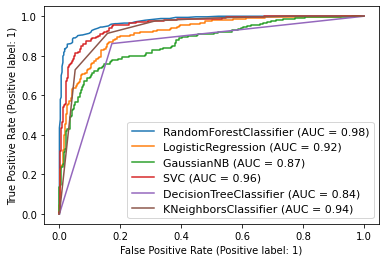

In [88]:
disp = plot_roc_curve(m,x_test,y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)     
plot_roc_curve(gnb, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [89]:
joblib.dump(final_model,'HR Analytics Project- Understanding the Attrition in HR.pkl')

['HR Analytics Project- Understanding the Attrition in HR.pkl']

In [90]:
model=joblib.load("HR Analytics Project- Understanding the Attrition in HR.pkl")

In [91]:
Prediction = model.predict(x_test)
Prediction

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [92]:
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":Prediction},index=range(len(a)))
df_final

,Original,Predicted
0,1,1
1,0,1
2,0,0
3,1,1
4,1,1
...,...,...
690,0,0
691,1,1
692,1,0
693,1,1


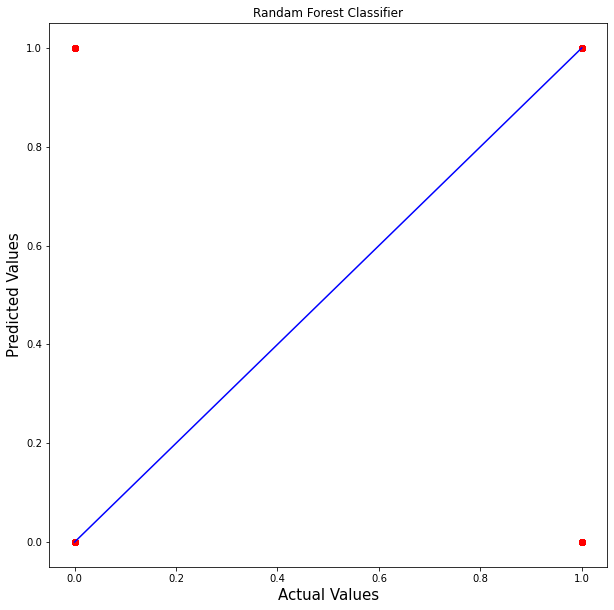

In [93]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Prediction, c='r')
plt1 = max(max(Prediction), max(y_test))
plt2 = min(min(Prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Randam Forest Classifier")
plt.show()